In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

<AxesSubplot:>

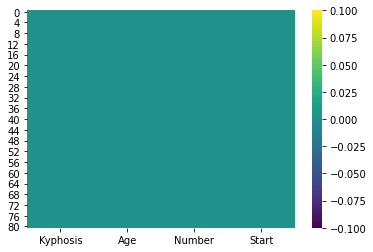

In [8]:
sns.heatmap(df.isnull(),cmap='viridis')

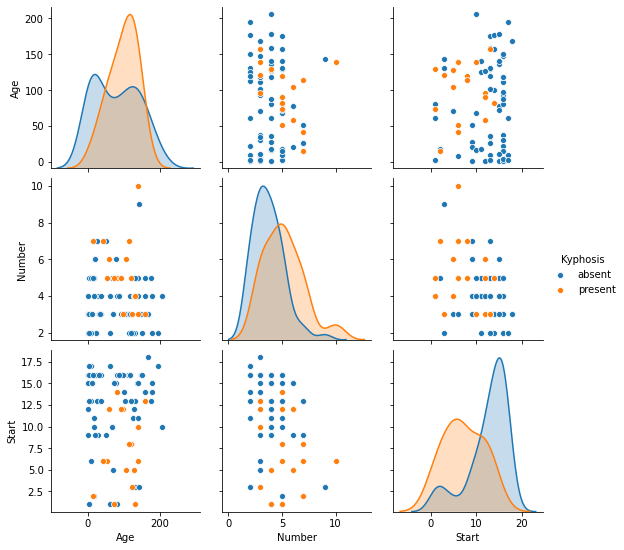

In [9]:
sns.pairplot(df,hue='Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop('Kyphosis',axis=1)

In [13]:
y= df['Kyphosis']

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

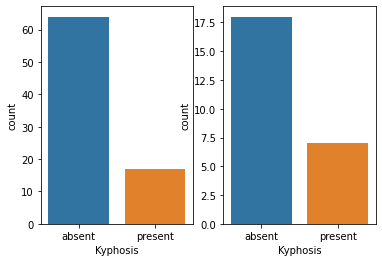

In [33]:
plt.subplot(1,2,1)
sns.countplot(y)

plt.subplot(1,2,2)
sns.countplot(y_test)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=10)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
d_tree=DecisionTreeClassifier()

In [36]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
predictions = d_tree.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
#Training set
predict_train = d_tree.predict(X_train)
print('\n')
print(classification_report(y_train,predict_train))



              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        46
     present       1.00      1.00      1.00        10

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.94      0.92        18
     present       0.83      0.71      0.77         7

    accuracy                           0.88        25
   macro avg       0.86      0.83      0.84        25
weighted avg       0.88      0.88      0.88        25



In [40]:
print(confusion_matrix(y_test,predictions))

[[17  1]
 [ 2  5]]


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc= RandomForestClassifier(n_estimators=100)

In [73]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
rfc_pred= rfc.predict(X_test)

In [75]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.81      0.94      0.87        18
     present       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25

[[17  1]
 [ 4  3]]


Tree Visualization

In [81]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 


In [82]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

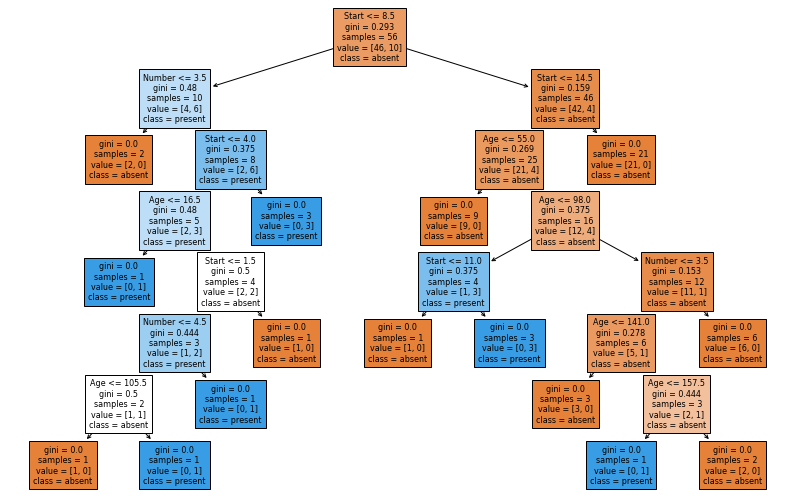

In [90]:
from sklearn import tree
plt.figure(figsize=(14,9))
_ = tree.plot_tree(d_tree,filled=True,feature_names=features,fontsize=8,class_names=['absent','present'])